## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [37]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [18]:
df = pd.read_csv(r"C:\Users\felip\OneDrive\Ebac\Arvore de decisão 1 e 2\Arvore 2\Pratica 1\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:

df = df.dropna()

In [20]:
df.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
#df['ocean_proximity'].value_counts()
df = df.drop('ocean_proximity',axis=1)

In [27]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [28]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [30]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [33]:

regr_2 = DecisionTreeRegressor(max_depth=8)

regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [39]:
y_pred = regr_2.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

In [43]:
##pós poda

path = regr_2.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [46]:
modelos = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(max_depth=8, ccp_alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    modelos.append(model)



### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [47]:

mse_values = []
for model in modelos:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

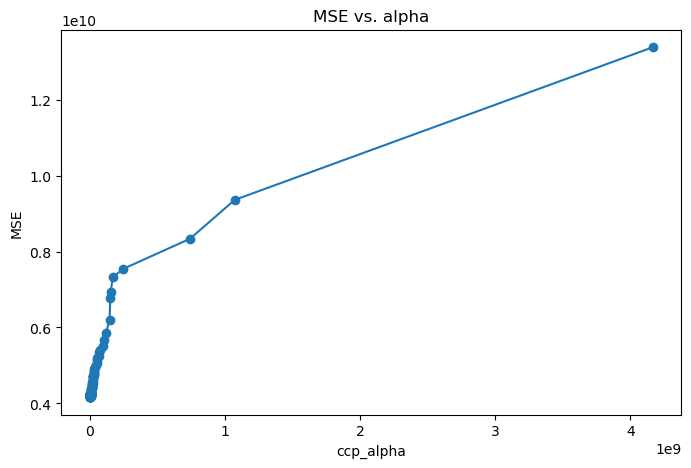

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, mse_values, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("MSE")
plt.title("MSE vs. alpha")
plt.show()

alpha_ideal = ccp_alphas[mse_values.index(min(mse_values))]



### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [49]:
best_model = modelos[mse_values.index(min(mse_values))]
from sklearn.metrics import r2_score
r2 = r2_score(y_test, best_model.predict(X_test))


### 7. Visualize esta árvore.

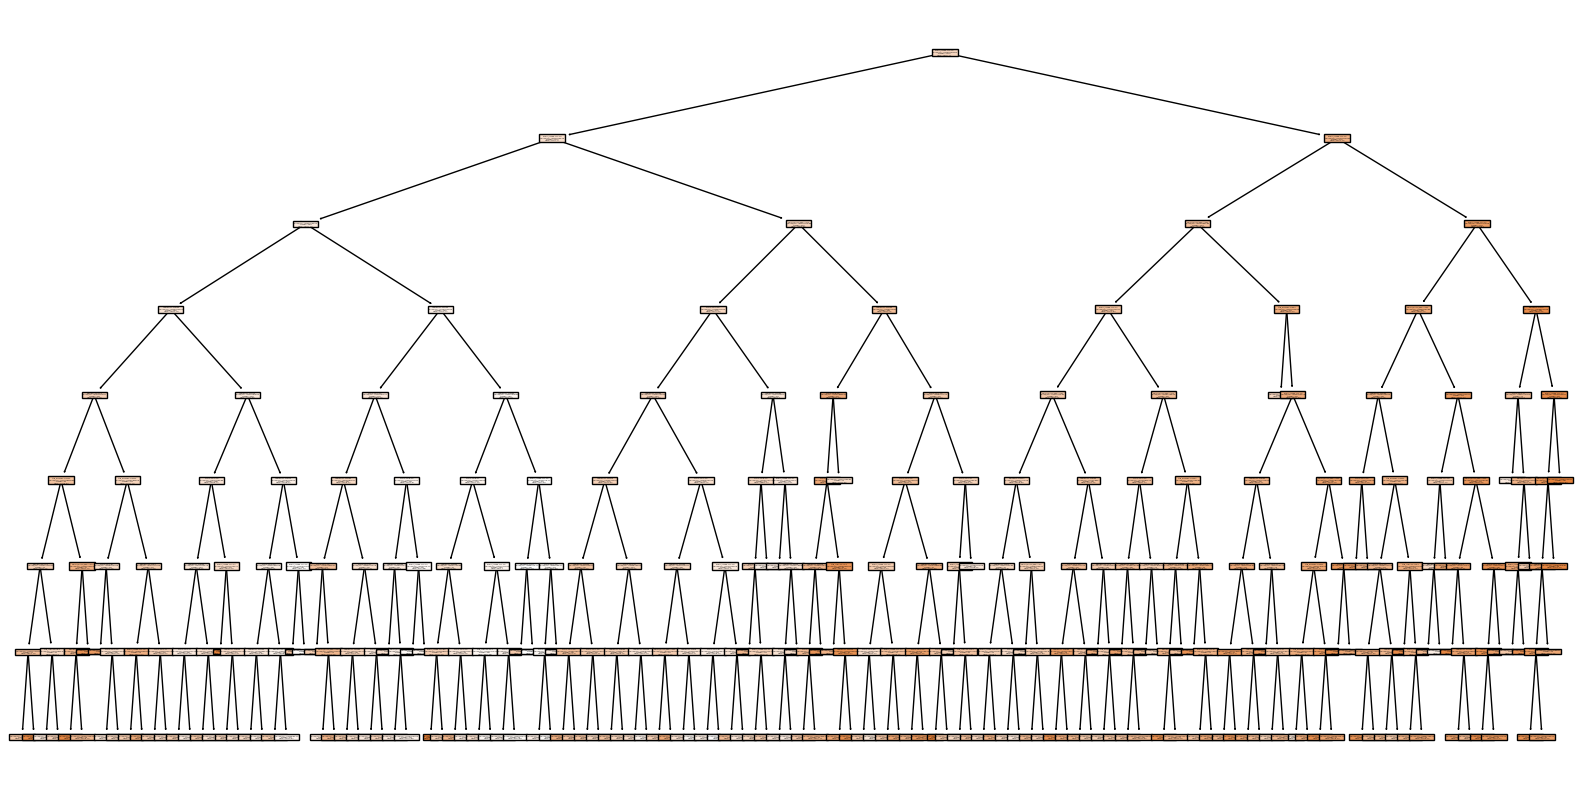

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X_train.columns)
plt.show()
